# Importando Bibliotecas

In [2]:
library(repr)
library(caTools)
options(repr.plot.width = 4, repr.plot.height = 4)
#Preprocessamento
library(CatEncoders)
library(gplots)
#Matricas
library(caret)
# Logistic
library(scales) 

# Dados

In [3]:
df <- read.csv("../datasets/titanic/train.csv")
head(df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


## Pré-Processamento de Dados

In [4]:
# Extração de Pronomes
df$Name <- ifelse(grepl(", Mr. ", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Capt", df$Name), 'Tripulacao', as.character(df$Name))
df$Name <- ifelse(grepl("Don", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Major", df$Name), 'Tripulacao', as.character(df$Name))
df$Name <- ifelse(grepl("Col", df$Name), 'Tripulacao', as.character(df$Name))
df$Name <- ifelse(grepl("Dr", df$Name), 'Dr', as.character(df$Name))
df$Name <- ifelse(grepl("Rev", df$Name), 'Rev', as.character(df$Name))
df$Name <- ifelse(grepl("Sir", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Jonkheer", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Dona", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Countess", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Mme", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Lady", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Mrs", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Mlle", df$Name), 'Miss', as.character(df$Name))
df$Name <- ifelse(grepl("Ms", df$Name), 'Miss', as.character(df$Name))
df$Name <- ifelse(grepl("Miss", df$Name), 'Miss', as.character(df$Name))
df$Name <- ifelse(grepl("Master", df$Name), 'Master', as.character(df$Name))

# Categóricas para Numéricas
le_name <- LabelEncoder.fit(unique(df$Name))
df$Name <- transform(le_name, df$Name)

# Substituir valores ausentes/nulos
media <- mean(df$Age, na.rm = TRUE)
df$Age <- ifelse(is.na(df$Age), media, df$Age)

t <- table(df$Embarked)
moda <- names(t[t == max(t)])

df$Embarked <- ifelse(is.na(df$Embarked), as.character(moda), as.character(df$Embarked) )

# Categórico Para numérico
le_sex <- LabelEncoder.fit(unique(df$Sex))
df$Sex <- transform(le_sex, df$Sex)

le_embarked <- LabelEncoder.fit(unique(df$Embarked))
df$Embarked <- transform(le_embarked, df$Embarked)

# Remoção de colunas
df$PassengerId <- NULL
df$Ticket <- NULL
df$Cabin <- NULL

#Escalonamento 
df[, c('Age', 'Fare')] <- scale(df[, c('Age', 'Fare')])

df$Name = factor(df$Name)
df$Pclass = factor(df$Pclass)
df$Sex = factor(df$Sex)
df$Embarked = factor(df$Embarked)

head(df)
str(df)

Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,4,2,-0.5921480,1,0,-0.5021631,4
1,1,5,1,0.6384304,1,0,0.7864036,2
1,3,3,1,-0.2845034,0,0,-0.4885799,4
1,1,5,1,0.4076970,1,0,0.4204941,4
0,3,4,2,0.4076970,0,0,-0.4860644,4
0,3,4,2,0.0000000,0,0,-0.4778481,3


'data.frame':	891 obs. of  9 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name    : Factor w/ 7 levels "1","2","3","4",..: 4 5 3 5 4 4 4 2 5 5 ...
 $ Sex     : Factor w/ 2 levels "1","2": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  -0.592 0.638 -0.285 0.408 0.408 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  -0.502 0.786 -0.489 0.42 -0.486 ...
 $ Embarked: Factor w/ 4 levels "1","2","3","4": 4 2 4 4 4 3 4 4 4 2 ...


# Divisão dos dados em treino e teste

In [5]:
set.seed(0)
divisao <- sample.split(df$Survived, SplitRatio = 0.75)

treino <- subset(df, divisao == TRUE)
teste <-  subset(df, divisao == FALSE)

x_train <- treino[,-1]
y_train <- treino$Survived

x_test <- teste[,-1]
y_test <- teste$Survived

# Criando o Modelo

- **formula** - Um objeto da classe "fórmula" (ou que possa ser coagido a essa classe): uma descrição simbólica do modelo a ser ajustado. Os detalhes da especificação do modelo são fornecidos em 'detils'. 
- **Family** - Uma descrição da distribuição de erro e função de link a ser usada no modelo. Para glm, pode ser uma cadeia de caracteres que nomeia uma função de família, uma função de família ou o resultado de uma chamada para uma função de família. Para glm.fit, apenas a terceira opção é suportada. (Veja a família para detalhes das funções familiares.) 
- **data** - Um quadro de dados opcional, lista ou ambiente (ou objeto coercível por as.data.frame para um quadro de dados) contendo as variáveis no modelo. Se não forem encontradas nos dados, as variáveis são obtidas do ambiente (fórmula), normalmente o ambiente a partir do qual glm é chamado. 

In [6]:
classificador = glm(Survived ~ ., family = binomial, data = treino)
classificador


Call:  glm(formula = Survived ~ ., family = binomial, data = treino)

Coefficients:
(Intercept)      Pclass2      Pclass3        Name2        Name3        Name4  
    31.8946      -0.7900      -1.9841       3.4428     -15.2937      -0.5004  
      Name5        Name6        Name7         Sex2          Age        SibSp  
   -14.8067     -15.4238       0.1838     -17.9758      -0.2891      -0.7290  
      Parch         Fare    Embarked2    Embarked3    Embarked4  
    -0.3062       0.1799     -13.4656     -13.4034     -13.8597  

Degrees of Freedom: 667 Total (i.e. Null);  651 Residual
Null Deviance:	    889.3 
Residual Deviance: 522.9 	AIC: 556.9

# Prever um valor

- A função  **predict** retorna um vetor de probabilidade, com a fração daquele dado pertencer a cada classe. 

In [7]:
Pclass <- 1
Name <- 'Miss'
Sex <- 'female'
Age <- 5.0
SibSp <- 1
Parch <- 1
Fare <- 500.0
Embarked <- 'C'

data = data.frame(Pclass, Name, Sex, Age, SibSp, Parch, Fare, Embarked)

#Tratando os Dados
# Categóricas para Numéricas

data$Name <- transform(le_name, as.character(data$Name))
data$Sex  <- transform(le_sex, (data$Sex))
data$Embarked <- transform(le_embarked, as.character(data$Embarked))

data$Name = factor(data$Name)
data$Pclass = factor(data$Pclass)
data$Sex = factor(data$Sex)
data$Embarked = factor(data$Embarked)


#Classificando
previsao = predict(classificador, newdata = data, type = 'response')
previsao

1 
1

## Coeficientes

- O atributo **coefficients** armazena um vetor com os coeficientes
- Na primeira posição armazena o termo independente no modelo linear **intercept**.
- Na segunda posiçao armazena os coeficientes estimados para o problema de regressão linear (inclinação da reta)
- A função **sumary** com o atributo **r.squared** contém o coeficente de determinação

In [8]:
classificador$coefficients[1]
classificador$coefficients[2:4]

(Intercept) 
   31.89457

Pclass2    Pclass3      Name2 
-0.7899923 -1.9840639  3.4428499

## Prever os dados de Teste

In [9]:
pred = predict(classificador, newdata = x_test, type = 'response')

previsao = ifelse((pred > 0.5), 1, 0)

acuracia = 100 * sum(previsao == y_test)/length(y_test)
acuracia

[1] 81.16592

# Matriz de Confusão

- A função **table** realiza o agrupamento dos dados
- A função **confusionMatriz** da biblioteca **caret** também calcula a matriz de confusão + as métricas

In [10]:
matriz_confusao = table(y_test, previsao)
matriz_confusao

      previsao
y_test   0   1
     0 119  18
     1  24  62

In [11]:
matriz = confusionMatrix(factor(previsao), factor(y_test))
matriz

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 119  24
         1  18  62
                                          
               Accuracy : 0.8117          
                 95% CI : (0.7541, 0.8608)
    No Information Rate : 0.6143          
    P-Value [Acc > NIR] : 1.613e-10       
                                          
                  Kappa : 0.5973          
                                          
 Mcnemar's Test P-Value : 0.4404          
                                          
            Sensitivity : 0.8686          
            Specificity : 0.7209          
         Pos Pred Value : 0.8322          
         Neg Pred Value : 0.7750          
             Prevalence : 0.6143          
         Detection Rate : 0.5336          
   Detection Prevalence : 0.6413          
      Balanced Accuracy : 0.7948          
                                          
       'Positive' Class : 0               
                              

## Personalizando a Matriz de Confusão

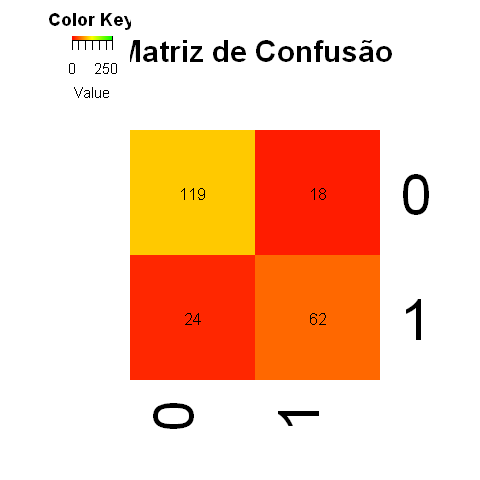

In [12]:
my_palette <- colorRampPalette(c("red", "yellow", "green"))

col_breaks = c(0:50, 51:100, 101:300)

heatmap.2(matriz_confusao,
    Rowv = 'NA',
    cellnote = matriz_confusao, 
    main = "Matriz de Confusão",
    notecol="black",      
    density.info="none",  
    trace="none",        
    col=my_palette,       
    breaks=col_breaks,   
    dendrogram= 'none',     
    Colv="NA" 
)

# Métricas

- **Precisão** que é a fração de instâncias recuperadas que são relevantes, 
- **Recall** - que é a fração de instâncias relevantes que são recuperadas 
- **f-score** - é 2 * precisão * recall / (precisão + recall) é 

In [13]:
precision(factor(previsao), factor(y_test))
'Morto'
precision(factor(previsao), factor(y_test), relevant = 2)
'Vivo'
precision(factor(previsao), factor(y_test), relevant = 1)

[1] 0.8321678

[1] "Morto"

[1] 0.775

[1] "Vivo"

[1] 0.8321678

In [14]:
recall(factor(previsao), factor(y_test))
'Morto'
recall(factor(previsao), factor(y_test), relevant = 2)
'Vivo'
recall(factor(previsao), factor(y_test), relevant = 1)

[1] 0.8686131

[1] "Morto"

[1] 0.7209302

[1] "Vivo"

[1] 0.8686131

# Validação Cruzada

- **method = cv** - indica que iremos usar o método crossvalidation
- **number = 10** - define o número de fold
- **method = LogitBoost** - indica que iremos usar o algorítmo de Regressão Logística

In [15]:
controle_treinamento = trainControl(method = 'cv', number = 10)
df$Survived = factor(df$Survived)
modelo = train(Survived ~ ., data = df, trControl = controle_treinamento, method = 'LogitBoost')
modelo$results

nIter,Accuracy,Kappa,AccuracySD,KappaSD
11,0.8013180,0.5789736,0.03605244,0.07711033
21,0.7957249,0.5553089,0.02890208,0.06431607
31,0.8002196,0.5687788,0.02775902,0.06096515
